In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import os
import sys

project_root = os.path.abspath('../')  # adjust path as needed
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from data_preprocessing import data_preprocess as dp
import pipeline_helper_functions.schofield_model_helper as sm

**1. PARTIES INITIAL POSITIONS**

In [3]:
x_var = "Opposition to Immigration"
y_var = "Welfare State"
years = [2009, 2013, 2017, 2021, 2024]

In [4]:
dfs = []

for yr in years:
    party_scaled, _ = dp.get_scaled_party_voter_data(x_var=x_var,
                                                     y_var=y_var,
                                                     year=str(yr))
    df = party_scaled[['Party_Name',
                        f"{x_var} Combined",
                        f"{y_var} Combined" ]].copy()
    # rename to something shorter
    df = df.rename(columns={
        f"{x_var} Combined": f"{x_var} Scaled",
        f"{y_var} Combined": f"{y_var} Scaled"
    })
    df['Year'] = int(yr)   
    dfs.append(df)

party_all = pd.concat(dfs, ignore_index=True)
party_all = party_all[party_all['Party_Name'] != 'SSW']
party_all['Year'] = party_all['Year'].astype(int)

parties = party_all['Party_Name'].unique()

FileNotFoundError: CSV file not found at: data_folder/party_dataset.csv

In [ ]:
# 1) Prepare a color map (same palette you were using)
palette = px.colors.qualitative.Dark2
parties = party_all['Party_Name'].unique()
color_map = {p: palette[i % len(palette)] for i, p in enumerate(parties)}

# 2) Build a Figure from scratch
fig = go.Figure()

for party in parties:
    dfp = (party_all
           .query("Party_Name == @party")
           .sort_values("Year")
           .reset_index(drop=True))

    fig.add_trace(go.Scatter(
        x=dfp[f"{x_var} Scaled"],
        y=dfp[f"{y_var} Scaled"],
        mode="lines",
        line=dict(color=color_map[party], width=2),
        name=party,
    ))

    fig.add_trace(go.Scatter(
        x=dfp[f"{x_var} Scaled"],
        y=dfp[f"{y_var} Scaled"],
        mode="markers",
        marker=dict(color=color_map[party], size=8),
        showlegend=False,
    ))

    for i in range(len(dfp)-1):
        x0, y0 = dfp.loc[i,   f"{x_var} Scaled"], dfp.loc[i,   f"{y_var} Scaled"]
        x1, y1 = dfp.loc[i+1, f"{x_var} Scaled"], dfp.loc[i+1, f"{y_var} Scaled"]
        fig.add_annotation(
            x=x1, y=y1,
            ax=x0, ay=y0,
            xref="x", yref="y",
            axref="x", ayref="y",
            showarrow=True,
            arrowhead=4,      # bigger head
            arrowsize=1,      # overall scale
            arrowwidth=3,     # thicker line
            arrowcolor=color_map[party]
        )

fig.update_layout(
    showlegend=True,
    legend_title_text="PARTY",
    legend=dict(
        orientation="v",
        x=1.02, y=1,
        bordercolor="lightgrey",
        borderwidth=1
    ),
    width=1500, height=800,
    margin=dict(l=80, r=200, t=100, b=80),
    title=dict(
        text="<b>Parties on the Move (2009–2024)</b>",
        x=0.5, xanchor="center"
    ),
    title_font=dict(family="Arial, sans-serif", size=22)
)

fig.update_xaxes(
    range=[-1.5, 1.5],
    title=dict(text=f"<b>{x_var}</b>",
               font=dict(family="Arial, sans-serif", size=16)),
    title_standoff=10
)
fig.update_yaxes(
    range=[-1.5, 1.5],
    title=dict(text=f"<b>{y_var}</b>",
               font=dict(family="Arial, sans-serif", size=16)),
    title_standoff=10
)

fig.update_layout(margin=dict(l=120, r=200, t=100, b=100))

fig.add_annotation(
    text="<i>Immigration should be easier</i>",
    xref="paper", yref="paper",
    x=0.1, y=-0.05,
    xanchor="center", yanchor="top",
    showarrow=False
)
fig.add_annotation(
    text="<i>Immigration should be more difficult</i>",
    xref="paper", yref="paper",
    x=0.9, y=-0.05,
    xanchor="center", yanchor="top",
    showarrow=False
)

fig.add_annotation(
    text="<i>More welfare</i>",
    xref="paper", yref="paper",
    x=-0.04, y=0.88,
    xanchor="right", yanchor="middle",
    showarrow=False,
    textangle=-90
)
fig.add_annotation(
    text="<i>Less welfare</i>",
    xref="paper", yref="paper",
    x=-0.04, y=0.15,
    xanchor="right", yanchor="middle",
    showarrow=False,
    textangle=-90
)

fig.update_layout(
    template="plotly_white",
    paper_bgcolor="white",
    plot_bgcolor="white",
    margin=dict(l=120, r=200, t=100, b=100),
)

fig.update_xaxes(
    showgrid=True,
    gridcolor="lightgrey",
    range=[-1.5, 1.5],
    title=dict(text=f"<b>{x_var}</b>", font=dict(size=16)),
)

fig.update_yaxes(
    showgrid=True,
    gridcolor="lightgrey",
    range=[-1.5, 1.5],
    title=dict(text=f"<b>{y_var}</b>", font=dict(size=16)),
)

fig.show()


**2. VOTER DENSITY & PARTY POSITIONS**

In [ ]:
x_var = "Opposition to Immigration"
y_var = "Welfare State"
year  = "2021"

In [ ]:
party_scaled, voter_scaled = dp.get_scaled_party_voter_data(x_var=x_var, y_var=y_var, year=year)
party_scaled_df = party_scaled[['Country', 'Date', 'Calendar_Week', 'Party_Name', f'{x_var} Combined', f'{y_var} Combined', 'Label']].rename(
                            columns={f'{x_var} Combined': f'{x_var} Scaled', f'{y_var} Combined': f'{y_var} Scaled'})
party_centered, voter_centered = dp.center_party_voter_data(voter_df=voter_scaled, party_df=party_scaled_df, x_var=x_var, y_var=y_var)

c:\Users\denid\Desktop\Case_Study_TUM25\data_preprocessing\data_loading.py:39: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



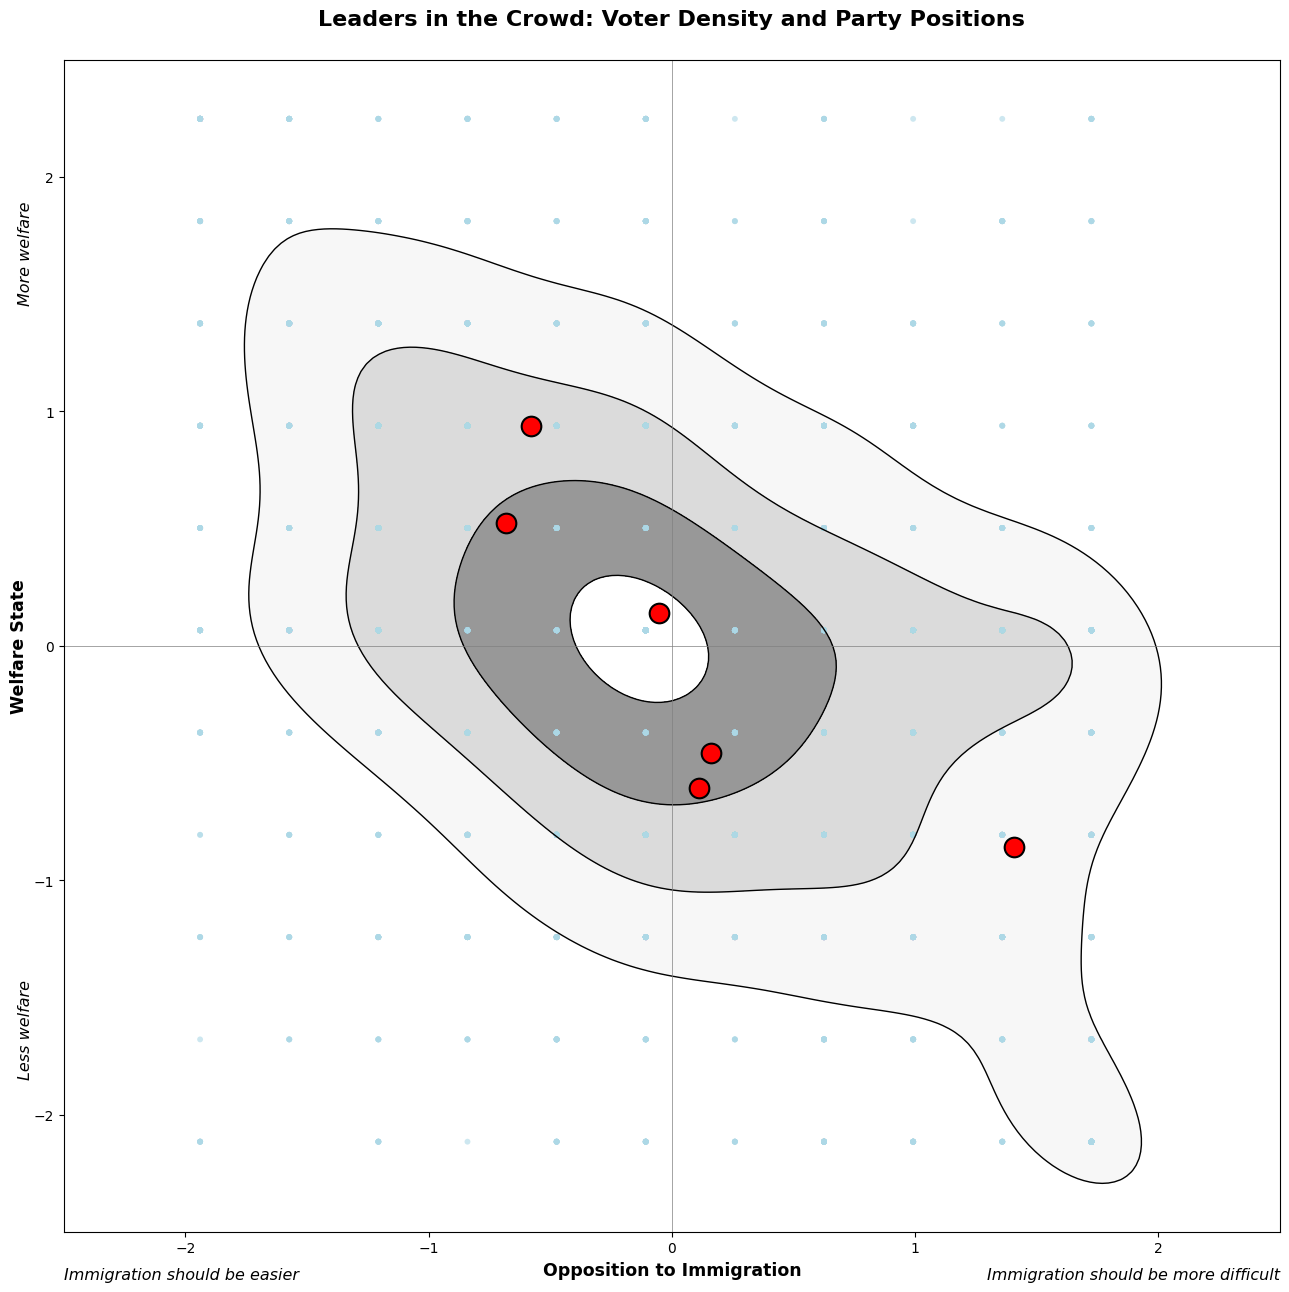

In [ ]:
x = voter_centered[f"{x_var} Centered"]
y = voter_centered[f"{y_var} Centered"]

fig, ax = plt.subplots(figsize=(13,13))

levels = [0.25, 0.50, 0.75, 0.95]

# 1) filled contours in a bright sequential palette
sns.kdeplot(
    x=x, y=y,
    fill=True,
    levels=levels,
    thresh=0,
    cut=2,
    bw_adjust=1.3,
    cmap='Greys',   
    alpha=0.6,
    ax=ax)

# 2) overlay the same contours as thick black lines
sns.kdeplot(
    x=x, y=y,
    fill=False,
    levels=levels,
    thresh=0,
    cut=2,
    bw_adjust=1.3,
    color='black',
    linewidths=1,
    linestyles='-',
    ax=ax)

# 3) raw voters underneath
ax.scatter(
    x, y,
    s=18, c='lightblue',
    edgecolor='none',
    alpha=0.6,
    label='Voter',
    zorder=1)

# 4) big red party markers with black border
px = party_centered[f"{x_var} Centered"]
py = party_centered[f"{y_var} Centered"]
ax.scatter(
    px, py,
    s=200, c='red',
    edgecolor='black', linewidth=1.5,
    zorder=3,
    label='Party')

# 5) white labels
# for name, xi, yi in zip(party_centered['Party_Name'], px, py):
#     ax.text(
#         xi, yi, name,
#         ha='center', va='center',
#         color='white', fontweight='bold',
#         zorder=4)

# 6) cross‐hair & labels
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_xlabel(f"{x_var}", fontsize=12.5, fontweight='bold')
ax.set_ylabel(f"{y_var}", fontsize=12.5, fontweight='bold')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# X-axis end-labels
ax.text(
    0, -0.03, 
    "Immigration should be easier",
    transform=ax.transAxes,
    ha="left", va="top",
    fontsize=11.5, fontstyle='italic')

ax.text(
    1, -0.03, 
    "Immigration should be more difficult",
    transform=ax.transAxes,
    ha="right", va="top",
    fontsize=11.5, fontstyle='italic')

# Y-axis end-labels
ax.text(
    -0.025, 0.88,
    "More welfare",
    transform=ax.transAxes,
    ha="right", va="top",
    rotation=90,
    fontsize=11.5, fontstyle='italic')

ax.text(
    -0.025, 0.13,
    "Less welfare",
    transform=ax.transAxes,
    ha="right", va="bottom",
    rotation=90,
    fontsize=11.5, fontstyle='italic')

ax.set_title(
    "Leaders in the Crowd: Voter Density and Party Positions",
    fontsize=16,         
    fontweight='bold',   
    pad=25)

plt.tight_layout()
plt.show()

**3. VOTER DENSITY & EQUILIBRIUM PARTY POSITIONS**

In [ ]:
x_var = "Opposition to Immigration"
y_var = "Welfare State"
year  = "2021"

# ------------------------------------------------------------- Data Preprocessing ------------------------------------------------------------------------------------------------
party_scaled, voter_scaled = dp.get_scaled_party_voter_data(x_var=x_var, y_var=y_var, year=year)
party_scaled_df = party_scaled[['Country', 'Date', 'Calendar_Week', 'Party_Name', f'{x_var} Combined', f'{y_var} Combined', 'Label']].rename(
                            columns={f'{x_var} Combined': f'{x_var} Scaled', f'{y_var} Combined': f'{y_var} Scaled'})
party_centered, voter_centered = dp.center_party_voter_data(voter_df=voter_scaled, party_df=party_scaled_df, x_var=x_var, y_var=y_var)

# ------------------------------------------- Valences from Multinomial Logistic Regression and from DATA  ------------------------------------------------------------------------
lambda_values_logit, lambda_df_logit = sm.fit_multinomial_logit(voter_centered=voter_centered, party_centered=party_centered, x_var=x_var, y_var=y_var)

lambda_values_external, lambda_df_external = sm.get_external_valences(lambda_df_logit=lambda_df_logit, year=year)

beta = 0.7


c:\Users\denid\Desktop\Case_Study_TUM25\data_preprocessing\data_loading.py:39: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.

c:\Users\denid\anaconda3\envs\i2dl\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
models = [("logit", lambda_values_logit, lambda_df_logit), ("external", lambda_values_external, lambda_df_external)]

In [ ]:
all_party_movements = []

for model_name, lambda_values, lambda_df in models:
    print(model_name)
    char_df = sm.compute_characteristic_matrices(lambda_values=lambda_values,
                                                beta=beta,
                                                voter_centered=voter_centered,
                                                party_centered=party_centered,
                                                lambda_df=lambda_df,
                                                x_var=x_var,
                                                y_var=y_var)
    
    # tag it with which model produced it:
    char_df = char_df.copy()
    char_df["Model"] = model_name
    all_party_movements.append(char_df)

# stitch them together
all_party_movements_df = pd.concat(all_party_movements, ignore_index=True)

logit
external


In [ ]:
lambda_map = {"logit": lambda_values_logit, "external": lambda_values_external}
lambda_map_df = {"logit": lambda_df_logit, "external": lambda_df_external}
equilibrium_results = []

for model, mov_df in all_party_movements_df.groupby("Model"):
    λ_vals = lambda_map[model]
    λ_df = lambda_map_df[model]
    parties = λ_df["Party_Name"].tolist()

    party_sub = party_centered.set_index("Party_Name").loc[parties].reset_index()
    # Re-align your λ_vals to exactly that same order:
    λ_series    = pd.Series(λ_vals, index=λ_df["Party_Name"])
    lambda_aligned = λ_series.loc[parties].to_numpy()
    
    # automatically pick out which parties need saddle‐point moves
    saddle_targets = mov_df.loc[mov_df["action"].str.contains("Saddle", case=False), "Party_Name"].tolist()
    
    # and which ones need local‐min‐point moves
    local_min_targets = mov_df.loc[mov_df["action"].str.contains("local minimum", case=False), "Party_Name"].tolist()
    
    # --- compute saddle results ---
    for party in saddle_targets:
        v_pos, t_opt, share_opt = sm.compute_optimal_movement_saddle_position(
            lambda_values     = lambda_aligned,
            lambda_df         = λ_df.loc[λ_df["Party_Name"].isin(parties)],
            voter_centered    = voter_centered,   
            party_centered    = party_sub,         
            beta              = beta,
            x_var             = x_var,
            y_var             = y_var,
            target_party_name = party)
        equilibrium_results.append({
            "Model":        model,
            "party":        party,
            "type":         "saddle",
            "direction_x":  float(v_pos[0]),
            "direction_y":  float(v_pos[1]),
            "t_opt":        float(t_opt),
            "share_opt":    float(share_opt)})
    
    # --- compute local‐min results ---
    for party in local_min_targets:
        z_opt, share_opt, info = sm.compute_optimal_movement_local_min_position(
            lambda_values     = lambda_aligned,
            lambda_df         = λ_df.loc[λ_df["Party_Name"].isin(parties)],
            voter_centered    = voter_centered,
            party_centered    = party_sub,
            target_party_name = party,
            x_var             = x_var,
            y_var             = y_var)
        equilibrium_results.append({
            "Model":           model,
            "party":           party,
            "type":            "local_min",
            "optimal_position": z_opt,
            "share_opt":       float(share_opt)})
        
# put it all in one DataFrame
equilibrium_results_df = pd.DataFrame(equilibrium_results)
equilibrium_results_df_ex = equilibrium_results_df[equilibrium_results_df['Model'] == 'external']
print(equilibrium_results_df_ex)

      Model      party    type  direction_x  direction_y     t_opt  share_opt
0  external  90/Greens  saddle    -0.707107     0.707107  0.550950   0.200467
1  external      LINKE  saddle    -0.707107     0.707107  0.964755   0.133406
2  external        FDP  saddle    -0.707107     0.707107 -0.597614   0.212956
3  external    CDU/CSU  saddle    -0.707107     0.707107 -1.083257   0.109626
4  external        AfD  saddle    -0.707107     0.707107 -1.276948   0.110686


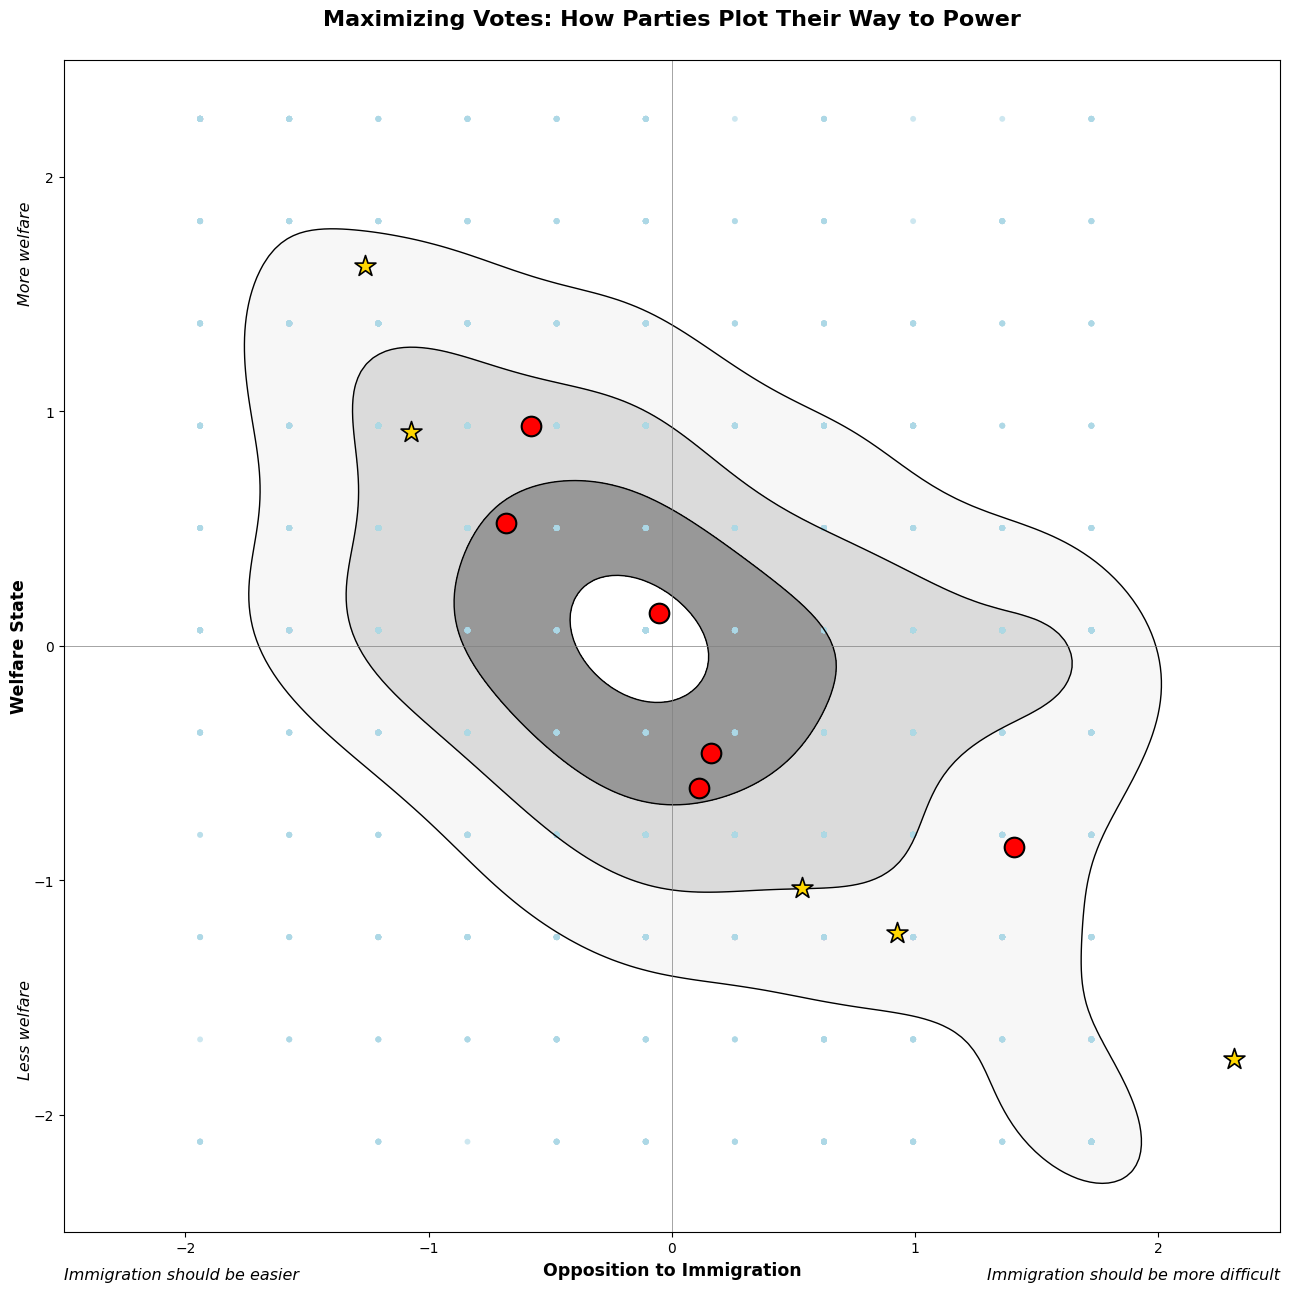

In [ ]:
x = voter_centered[f"{x_var} Centered"]
y = voter_centered[f"{y_var} Centered"]

fig, ax = plt.subplots(figsize=(13,13))

levels = [0.25, 0.50, 0.75, 0.95]

# 1) filled contours in a bright sequential palette
sns.kdeplot(
    x=x, y=y,
    fill=True,
    levels=levels,
    thresh=0,
    cut=2,
    bw_adjust=1.3,
    cmap='Greys',   
    alpha=0.6,
    ax=ax)

# 2) overlay the same contours as thick black lines
sns.kdeplot(
    x=x, y=y,
    fill=False,
    levels=levels,
    thresh=0,
    cut=2,
    bw_adjust=1.3,
    color='black',
    linewidths=1,
    linestyles='-',
    ax=ax)

# 3) raw voters underneath
ax.scatter(
    x, y,
    s=18, c='lightblue',
    edgecolor='none',
    alpha=0.6,
    label='Voter',
    zorder=1)

# 4) big red party markers with black border
px = party_centered[f"{x_var} Centered"]
py = party_centered[f"{y_var} Centered"]
ax.scatter(
    px, py,
    s=200, c='red',
    edgecolor='black', linewidth=1.5,
    zorder=3,
    label='Party')

# 5) white labels
for name, xi, yi in zip(party_centered['Party_Name'], px, py):
    ax.text(
        xi, yi, name,
        ha='center', va='center',
        color='white', fontweight='bold',
        zorder=4)

# 6) cross‐hair & labels
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_xlabel(f"{x_var}", fontsize=12.5, fontweight='bold')
ax.set_ylabel(f"{y_var}", fontsize=12.5, fontweight='bold')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# X-axis end-labels
ax.text(
    0, -0.03, 
    "Immigration should be easier",
    transform=ax.transAxes,
    ha="left", va="top",
    fontsize=11.5, fontstyle='italic')

ax.text(
    1, -0.03, 
    "Immigration should be more difficult",
    transform=ax.transAxes,
    ha="right", va="top",
    fontsize=11.5, fontstyle='italic')

# Y-axis end-labels
ax.text(
    -0.025, 0.88,
    "More welfare",
    transform=ax.transAxes,
    ha="right", va="top",
    rotation=90,
    fontsize=11.5, fontstyle='italic')

ax.text(
    -0.025, 0.13,
    "Less welfare",
    transform=ax.transAxes,
    ha="right", va="bottom",
    rotation=90,
    fontsize=11.5, fontstyle='italic')

ax.set_title(
    "Maximizing Votes: How Parties Plot Their Way to Power",
    fontsize=16,         
    fontweight='bold',   
    pad=25)


pc = party_centered.set_index('Party_Name')
for _, er in equilibrium_results_df_ex.iterrows():
    party = er['party']
    if party not in pc.index:
        continue

    # party's own coords
    origin = pc.loc[party, [f"{x_var} Centered", f"{y_var} Centered"]].values

    # equilibrium point z* = origin + t_opt * direction
    v     = np.array([er['direction_x'], er['direction_y']])
    z_opt = origin + er['t_opt'] * v

    # plot a gold star at z*
    ax.scatter(
        z_opt[0], z_opt[1],
        marker='*',
        s=250,
        c='gold',
        edgecolor='black',
        linewidth=1.2,
        zorder=5,
        label='_nolegend_'    
    )

    # 4) add a "Party*" label
    ax.text(
        z_opt[0], z_opt[1],
        f"{party}*",
        ha='center', va='center',
        fontsize=10, fontweight='bold',
        color='black',
        zorder=6
    )

plt.tight_layout()
plt.show()